# ASSIGNMENT
Greetings Dear Student!
Let's learn and get fascinated about the beauty of data science

### Import the Libraries

## Introduction

In [1]:
# Let's get introduced First
name = input("Please Enter Your Name : ")
ID = input("Please Enter Your ID: ")

print(f"Hello! This is {name} and my ID is {ID}")

Please Enter Your Name : Ahammad Nafiz
Please Enter Your ID: 0152330006
Hello! This is Ahammad Nafiz and my ID is 0152330006


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset
We will try to look into one of the very common diseases of our country, Diabetes. From this dataset, we will try to download and will perform Exploratory Data Analysis ( EDA ).

### Download from Google Drive

### Read the dataset

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Questions to Solve

### Question 1 : Basic Data Analysis

In [4]:
# Find out the Row and Column count of the dataset
print(f"Row: {df.shape[0]}")
print(f"Column: {df.shape[1]}")

Row: 100000
Column: 9


In [5]:
# Find out if there is any null values in any of the columns of the dataset
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
# Find out the basic statistical report of the dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


### Question 2: Data Distribution

In [8]:
# Find out the Gender wise distribution of the dataset
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [9]:
df.groupby('gender')['gender'].count() / len(df) * 100

gender
Female    58.552
Male      41.430
Other      0.018
Name: gender, dtype: float64

In [10]:
# gender wise hypertension distribution
df.groupby(['gender', 'hypertension'])['hypertension'].count()

gender  hypertension
Female  0               54355
        1                4197
Male    0               38142
        1                3288
Other   0                  18
Name: hypertension, dtype: int64

In [11]:
male_hypertension_yes = df.query("gender == 'Male' and hypertension == 1")
male_hypertension_no = df.query("gender == 'Male' and hypertension == 0")
female_hypertension_yes = df.query("gender == 'Female' and hypertension == 1")
female_hypertension_no = df.query("gender == 'Female' and hypertension == 0")

In [12]:
print(f"Male Have Hypertension {male_hypertension_yes.shape[0]} jon")
print(f"Male Have No Hypertension {male_hypertension_no.shape[0]} jon")
print(f"Female Have Hypertension {female_hypertension_yes.shape[0]} jon")
print(f"Femal Have No Hypertension {female_hypertension_no.shape[0]} jon")

Male Have Hypertension 3288 jon
Male Have No Hypertension 38142 jon
Female Have Hypertension 4197 jon
Femal Have No Hypertension 54355 jon


In [13]:
total = df.shape[0]
print(f"Male Have Hypertension {male_hypertension_yes.shape[0] / total * 100} %")
print(f"Male Have No Hypertension {male_hypertension_no.shape[0] / total * 100} %")
print(f"Female Have Hypertension {female_hypertension_yes.shape[0] / total * 100} %")
print(f"Femal Have No Hypertension {female_hypertension_no.shape[0] / total * 100} %")

Male Have Hypertension 3.288 %
Male Have No Hypertension 38.141999999999996 %
Female Have Hypertension 4.197 %
Femal Have No Hypertension 54.355 %


In [14]:
# gender wise heart_disease distribution
male_heart_disease_yes = df.query("gender == 'Male' and heart_disease == 1")
male_heart_disease_no = df.query("gender == 'Male' and heart_disease == 0")
female_heart_disease_yes = df.query("gender == 'Female' and heart_disease == 1")
female_heart_disease_no = df.query("gender == 'Female' and heart_disease == 0")

In [15]:
print(f"Male Have heart_disease {male_heart_disease_yes.shape[0]} jon")
print(f"Male Have No heart_disease {male_heart_disease_no.shape[0]} jon")
print(f"Female Have heart_disease {female_heart_disease_yes.shape[0]} jon")
print(f"Femal Have No heart_disease {female_heart_disease_no.shape[0]} jon")
total = df.shape[0]
print()
print(f"Male Have heart_disease {male_heart_disease_yes.shape[0] / total * 100} %")
print(f"Male Have No heart_disease {male_heart_disease_no.shape[0] / total * 100} %")
print(f"Female Have heart_disease {female_heart_disease_yes.shape[0] / total * 100} %")
print(f"Femal Have No heart_disease {female_heart_disease_no.shape[0] / total * 100} %")

Male Have heart_disease 2380 jon
Male Have No heart_disease 39050 jon
Female Have heart_disease 1562 jon
Femal Have No heart_disease 56990 jon

Male Have heart_disease 2.3800000000000003 %
Male Have No heart_disease 39.050000000000004 %
Female Have heart_disease 1.562 %
Femal Have No heart_disease 56.989999999999995 %


In [16]:
# gender wise smoking history
male_smoking_history_never = df.query("gender == 'Male' and smoking_history == 'never'")
male_smoking_history_No_Info = df.query("gender == 'Male' and smoking_history == 'No Info'")
male_smoking_history_current = df.query("gender == 'Male' and smoking_history == 'current'")
male_smoking_history_former = df.query("gender == 'Male' and smoking_history == 'former'")
male_smoking_history_ever = df.query("gender == 'Male' and smoking_history == 'ever'")
male_smoking_history_not_current = df.query("gender == 'Male' and smoking_history == 'not current'")

In [17]:
female_smoking_history_never = df.query("gender == 'Female' and smoking_history == 'never'")
female_smoking_history_No_Info = df.query("gender == 'Female' and smoking_history == 'No Info'")
female_smoking_history_current = df.query("gender == 'Female' and smoking_history == 'current'")
female_smoking_history_former = df.query("gender == 'Female' and smoking_history == 'former'")
female_smoking_history_ever = df.query("gender == 'Female' and smoking_history == 'ever'")
female_smoking_history_not_current = df.query("gender == 'Female' and smoking_history == 'not current'")

In [18]:
print(male_smoking_history_never.shape[0])
print(male_smoking_history_No_Info.shape[0])
print(male_smoking_history_current.shape[0])
print(male_smoking_history_former.shape[0])
print(male_smoking_history_ever.shape[0])
print(male_smoking_history_not_current.shape[0])
print()
print(female_smoking_history_never.shape[0])
print(female_smoking_history_No_Info.shape[0])
print(female_smoking_history_current.shape[0])
print(female_smoking_history_former.shape[0])
print(female_smoking_history_ever.shape[0])
print(female_smoking_history_not_current.shape[0])

12223
16110
4228
4578
1765
2526

22869
19700
5058
4774
2238
3913


In [19]:
# gender wise diabetes
male_diabetes_yes = df.query("gender == 'Male' and diabetes == 1")
male_diabetes_no = df.query("gender == 'Male' and diabetes == 0")
female_diabetes_yes = df.query("gender == 'Female' and diabetes == 1")
female_diabetes_no = df.query("gender == 'Female' and diabetes == 0")

print(f"Male Have diabetes {male_diabetes_yes.shape[0]} jon")
print(f"Male Have No diabetes {male_diabetes_no.shape[0]} jon")
print(f"Female Have diabetes {female_diabetes_yes.shape[0]} jon")
print(f"Femal Have No diabetes {female_diabetes_no.shape[0]} jon")
print()
total = df.shape[0]
print(f"Male Have diabetes {male_diabetes_yes.shape[0] / total * 100} %")
print(f"Male Have No diabetes {male_diabetes_no.shape[0] / total * 100} %")
print(f"Female Have diabetes {female_diabetes_yes.shape[0] / total * 100} %")
print(f"Femal Have No diabetes {female_diabetes_no.shape[0] / total * 100} %")

Male Have diabetes 4039 jon
Male Have No diabetes 37391 jon
Female Have diabetes 4461 jon
Femal Have No diabetes 54091 jon

Male Have diabetes 4.039000000000001 %
Male Have No diabetes 37.391000000000005 %
Female Have diabetes 4.460999999999999 %
Femal Have No diabetes 54.091 %


In [20]:
# Find out the Age distribution of the dataset
df['age'].value_counts()

age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

In [21]:
age = df.groupby('age')['age'].size().reset_index(name='count')
age = age.set_index('age')

In [22]:
age

,count
age,
0.08,36
0.16,59
0.24,87
0.32,89
0.40,66
...,...
76.00,733
77.00,730
78.00,682


In [23]:
# Find out which type of people with Smoking history are more prone to diabetes
diabetes = df[df['diabetes'] == 1]
diabetes['smoking_history'].value_counts()

smoking_history
never          3346
former         1590
No Info        1454
current         948
not current     690
ever            472
Name: count, dtype: int64

### Question 3: Statistical Decisions and Demographics

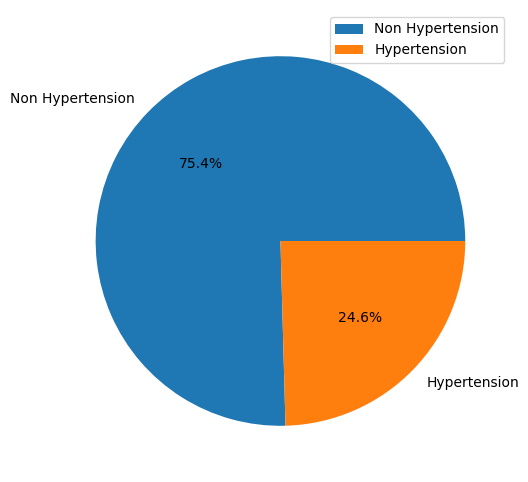

In [24]:
# Find out the graph for people with hypertension having diabetes
diabetes = df[df['diabetes'] == 1]
non_hypertension  = diabetes[diabetes['hypertension'] == 0]
hypertension  = diabetes[diabetes['hypertension'] == 1]
count = [len(non_hypertension), len(hypertension)]
label = ['Non Hypertension', 'Hypertension']

plt.figure(figsize=(8, 6))
plt.pie(count, labels=label, autopct='%1.1f%%')
plt.legend(loc="upper right")
plt.show()

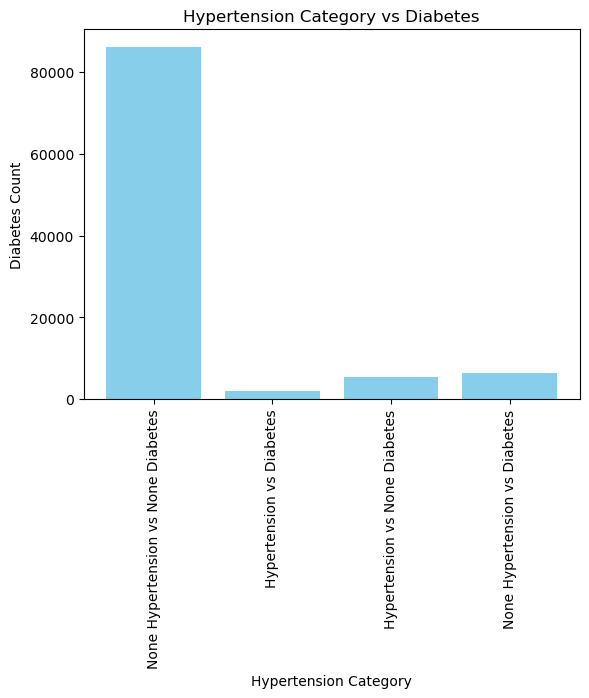

In [25]:
non_hyper_non_dia = df.query("hypertension == 0 and diabetes == 0")
hyper_dia = df.query("hypertension == 1 and diabetes == 1")
hyper_non_dia = df.query("hypertension == 1 and diabetes == 0")
non_hyper_dia = df.query("hypertension == 0 and diabetes == 1")

counts = [non_hyper_non_dia.shape[0], hyper_dia.shape[0], hyper_non_dia.shape[0], non_hyper_dia.shape[0]]
label = ['None Hypertension vs None Diabetes', 'Hypertension vs Diabetes', 'Hypertension vs None Diabetes', 'None Hypertension vs Diabetes']

plt.title('Hypertension Category vs Diabetes')
plt.bar(label, counts, color = 'skyblue')
plt.xlabel('Hypertension Category')
plt.ylabel('Diabetes Count')
plt.xticks(rotation=90)
plt.show()

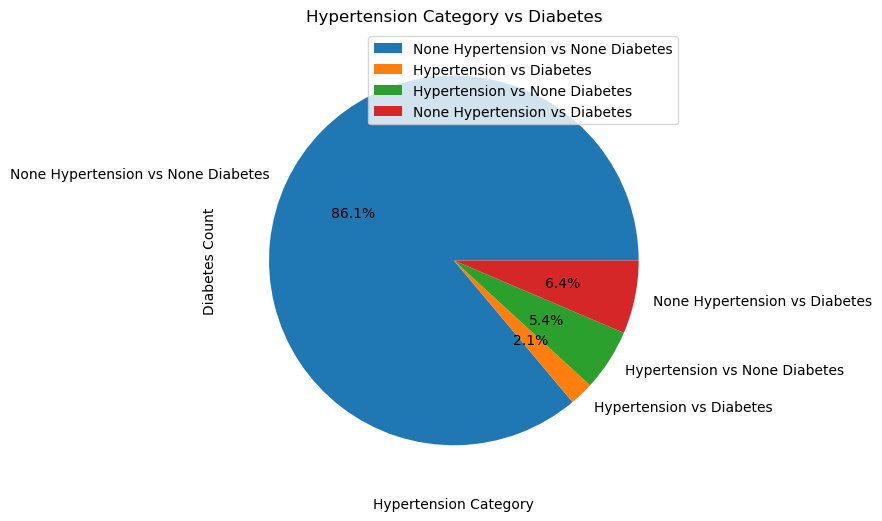

In [26]:
non_hyper_non_dia = df.query("hypertension == 0 and diabetes == 0")
hyper_dia = df.query("hypertension == 1 and diabetes == 1")
hyper_non_dia = df.query("hypertension == 1 and diabetes == 0")
non_hyper_dia = df.query("hypertension == 0 and diabetes == 1")

counts = [non_hyper_non_dia.shape[0], hyper_dia.shape[0], hyper_non_dia.shape[0], non_hyper_dia.shape[0]]
label = ['None Hypertension vs None Diabetes', 'Hypertension vs Diabetes', 'Hypertension vs None Diabetes', 'None Hypertension vs Diabetes']

plt.figure(figsize=(8, 6))
plt.title('Hypertension Category vs Diabetes')
plt.pie(counts, labels= label, autopct="%1.1f%%")
plt.legend(loc="upper right")
plt.xlabel('Hypertension Category')
plt.ylabel('Diabetes Count')
plt.show()

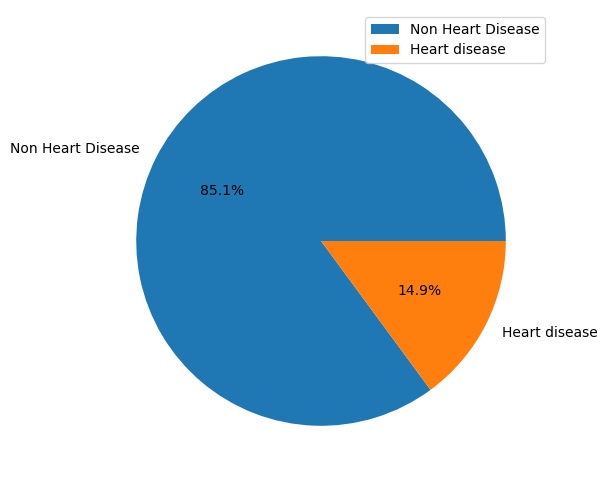

In [27]:
# Find out the graph for people with heart disease having diabetes
diabetes = df[df['diabetes'] == 1]
non_heart  = diabetes[diabetes['heart_disease'] == 0]
heart  = diabetes[diabetes['heart_disease'] == 1]
count = [len(non_heart), len(heart)]
label = ['Non Heart Disease', 'Heart disease']

plt.figure(figsize=(8, 6))
plt.pie(count, labels=label, autopct='%1.1f%%')
plt.legend()
plt.show()

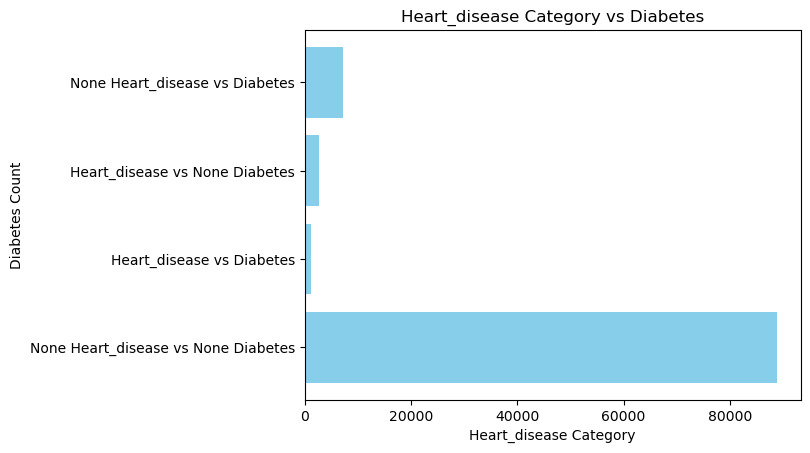

In [28]:
non_heart_non_dia = df.query("heart_disease == 0 and diabetes == 0")
heart_dia = df.query("heart_disease == 1 and diabetes == 1")
heart_non_dia = df.query("heart_disease == 1 and diabetes == 0")
non_heart_dia = df.query("heart_disease == 0 and diabetes == 1")

counts = [non_heart_non_dia.shape[0], heart_dia.shape[0], heart_non_dia.shape[0], non_heart_dia.shape[0]]
label = ['None Heart_disease vs None Diabetes', 'Heart_disease vs Diabetes', 'Heart_disease vs None Diabetes', 'None Heart_disease vs Diabetes']

plt.title('Heart_disease Category vs Diabetes')
plt.barh(label, counts, color = 'skyblue')
plt.xlabel('Heart_disease Category')
plt.ylabel('Diabetes Count')
plt.show()

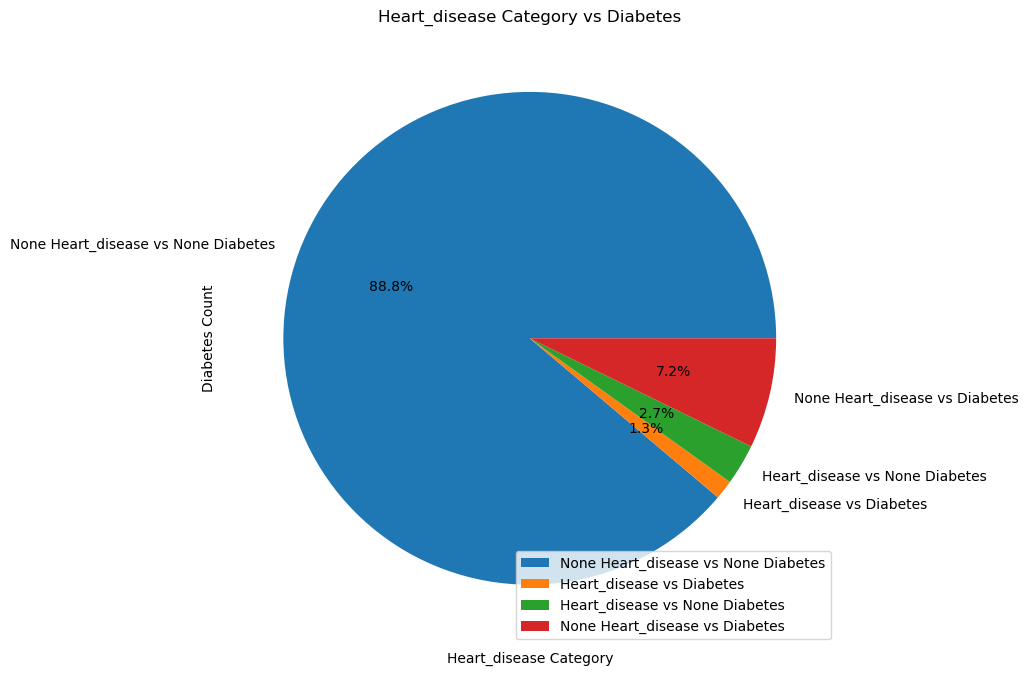

In [29]:
non_heart_non_dia = df.query("heart_disease == 0 and diabetes == 0")
heart_dia = df.query("heart_disease == 1 and diabetes == 1")
heart_non_dia = df.query("heart_disease == 1 and diabetes == 0")
non_heart_dia = df.query("heart_disease == 0 and diabetes == 1")

counts = [non_heart_non_dia.shape[0], heart_dia.shape[0], heart_non_dia.shape[0], non_heart_dia.shape[0]]
label = ['None Heart_disease vs None Diabetes', 'Heart_disease vs Diabetes', 'Heart_disease vs None Diabetes', 'None Heart_disease vs Diabetes']

plt.figure(figsize=(10, 8))
plt.title('Heart_disease Category vs Diabetes')
plt.pie(counts, labels=label, autopct="%1.1f%%")
plt.legend(loc="lower right")
plt.xlabel('Heart_disease Category')
plt.ylabel('Diabetes Count')
plt.show()

In [30]:
# Find out which BMI class has more tendency in having diabetes
def bmi_class(b):
    if b < 18.5:
        return 'Underweight'
    elif b < 25:
        return 'Normal weight'
    elif b < 30:
        return 'Overweight'
    else:
        return 'Obesity'

In [31]:
df['bmi class'] = df['bmi'].apply(bmi_class)

In [32]:
diabetes = df[df['diabetes'] == 1]

In [33]:
counts = diabetes['bmi class'].value_counts()

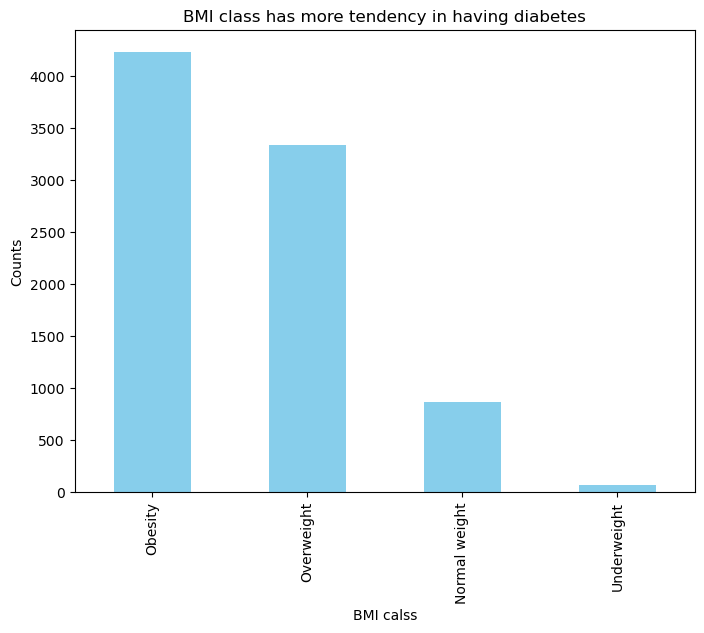

In [34]:
plt.figure(figsize=(8, 6))
counts.plot(kind = 'bar', color = 'skyblue')
plt.title('BMI class has more tendency in having diabetes')
plt.xlabel('BMI calss')
plt.ylabel('Counts')
plt.show()

In [35]:
bmi_c = counts.index.to_list()
values = counts.values

In [36]:
print(f"{counts.idxmax()} BMI class has more tendency in having diabetes")

Obesity BMI class has more tendency in having diabetes


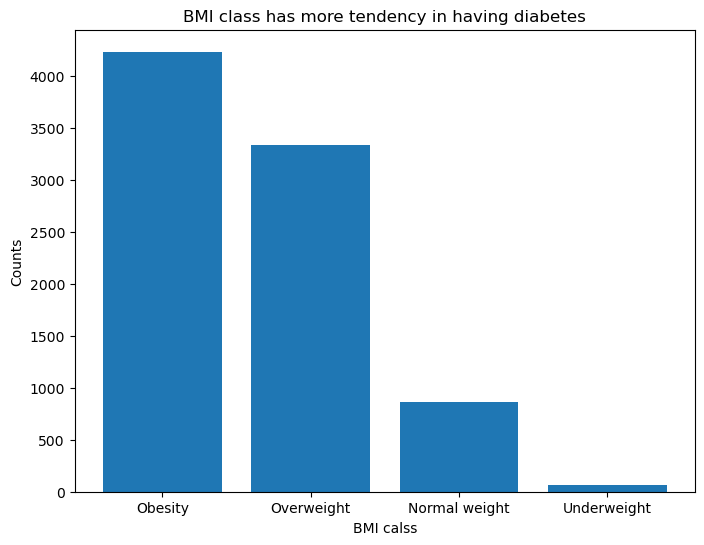

In [37]:
plt.figure(figsize=(8, 6))
plt.bar(bmi_c, values)
plt.title('BMI class has more tendency in having diabetes')
plt.xlabel('BMI calss')
plt.ylabel('Counts')
plt.show()